In [401]:
%pip install apyori

Note: you may need to restart the kernel to use updated packages.Collecting apyori
  Using cached apyori-1.1.2.tar.gz (8.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'



  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



In [456]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import seaborn as sns
from datetime import datetime
import sklearn
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from IPython.display import Image, display, HTML
import warnings
warnings.filterwarnings('ignore')


In [457]:
main_data= pd.read_csv("consumer behaviour.csv")
df = main_data.copy()
df


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [405]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [406]:
df.isnull().sum()


order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [407]:
df['days_since_prior_order'].unique()


array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [408]:
# TAKING CARE OF NULL VALUES
for col in df.columns:
    if df[col].dtypes == 'float64':
        df[col].fillna(-1,inplace=True) 


In [409]:
df.isnull().sum()


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [410]:
df.isnull().sum()


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [411]:
# CONVERTING DATA TYPES
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)


In [412]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


In [413]:
for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))
        

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

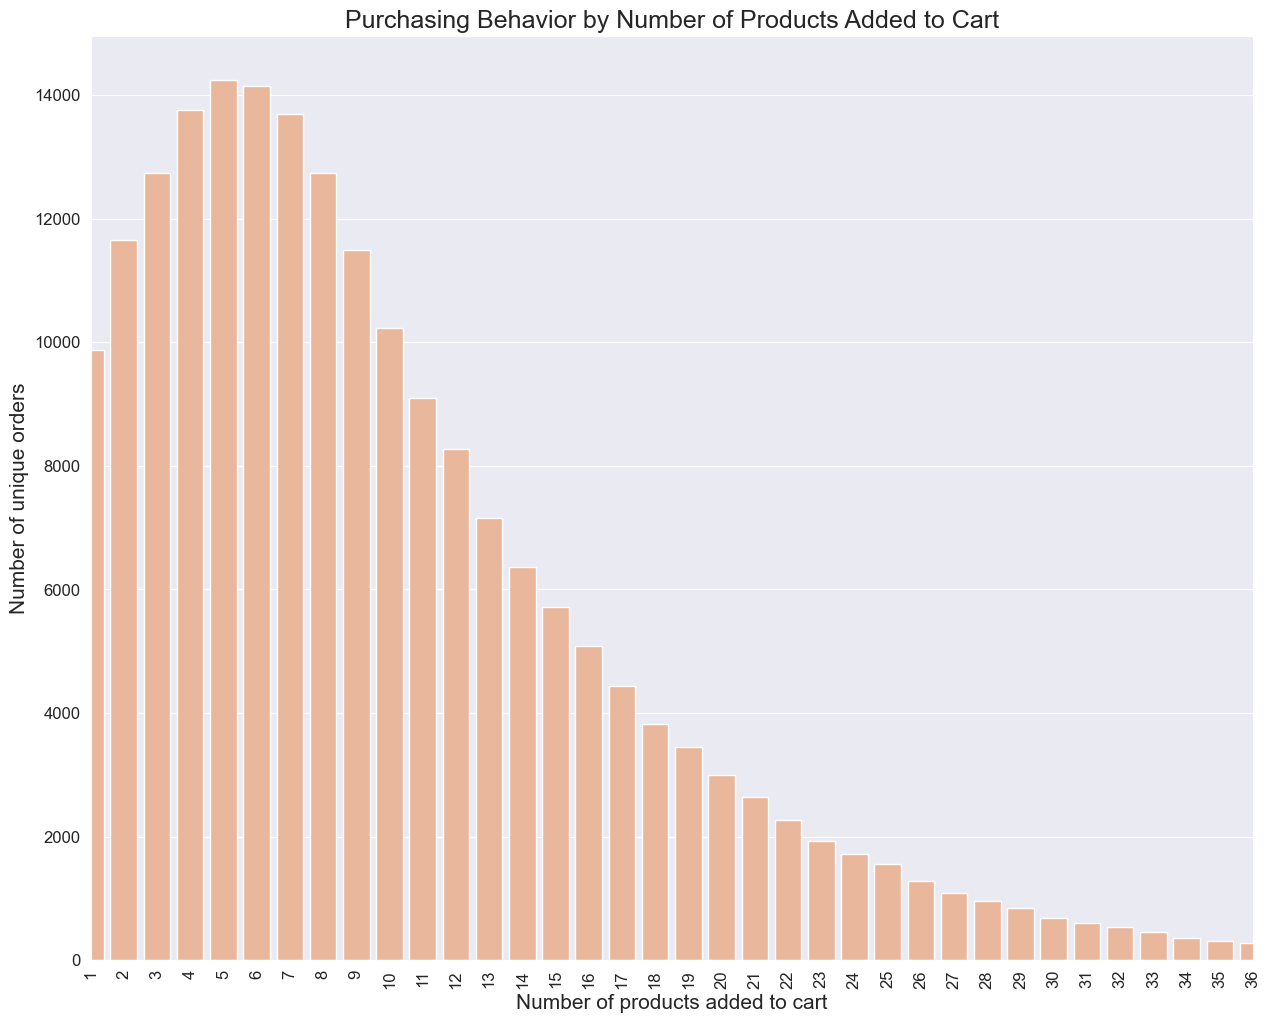

In [414]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
sns.set_palette("rocket_r")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
ax.grid(True, axis='y')
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of unique orders', fontsize=15)
plt.xlabel('Number of products added to cart', fontsize=15)
plt.title('Purchasing Behavior by Number of Products Added to Cart', fontsize=18)
plt.xlim(0, 35)  # limit the X axis values to 35
plt.show()


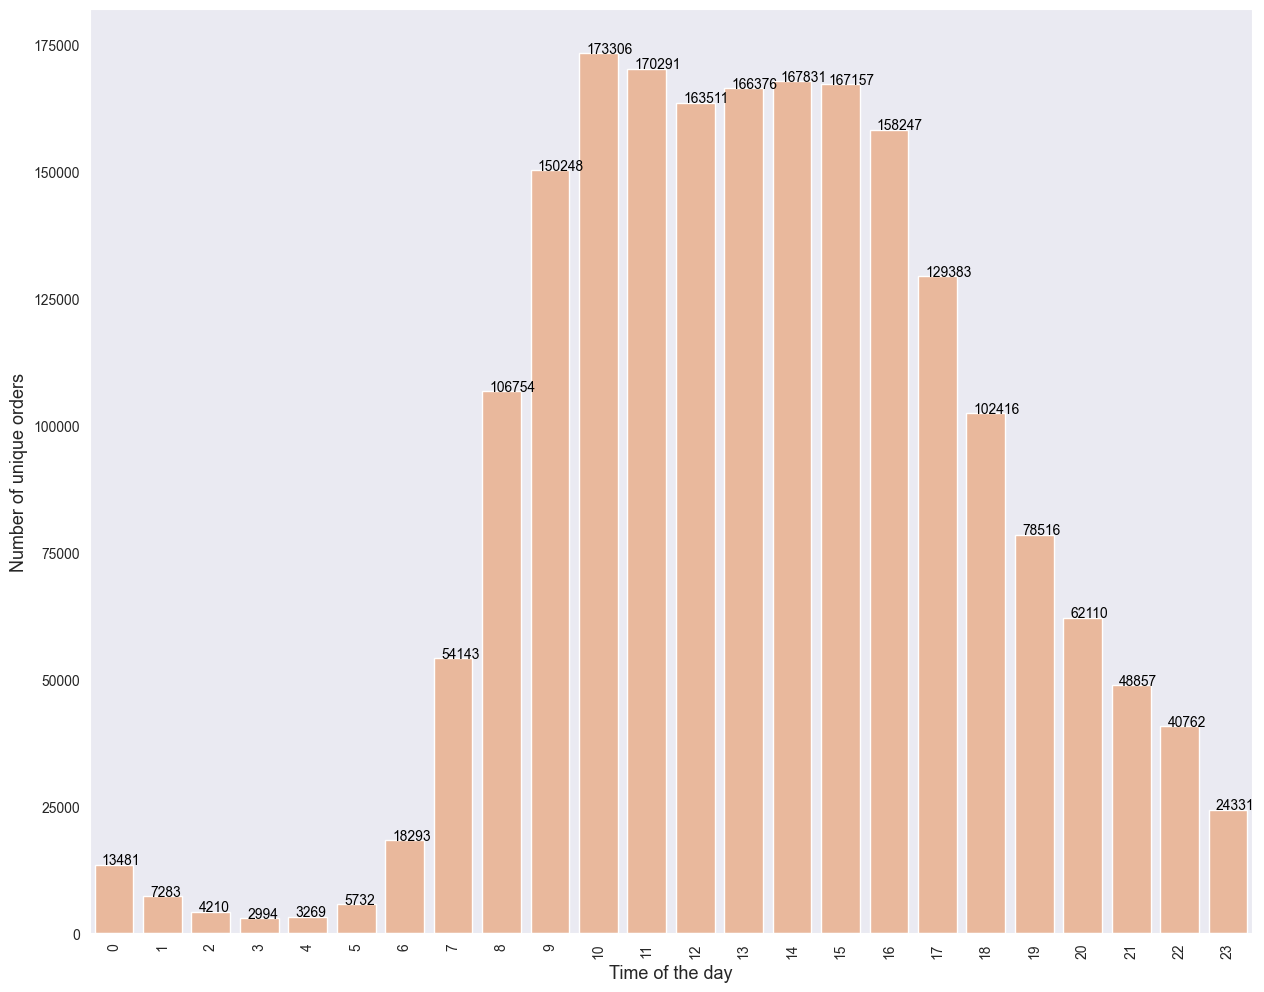

In [415]:
# TIME OF THE DAY WHEN THE ORDER WAS MADE
grouped = df.groupby('order_hour_of_day', as_index=True).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)


f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x = grouped.index, y = grouped.user_id)
sns.color_palette("rocket_r", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Time of the day', fontsize=13)

for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

plt.show()


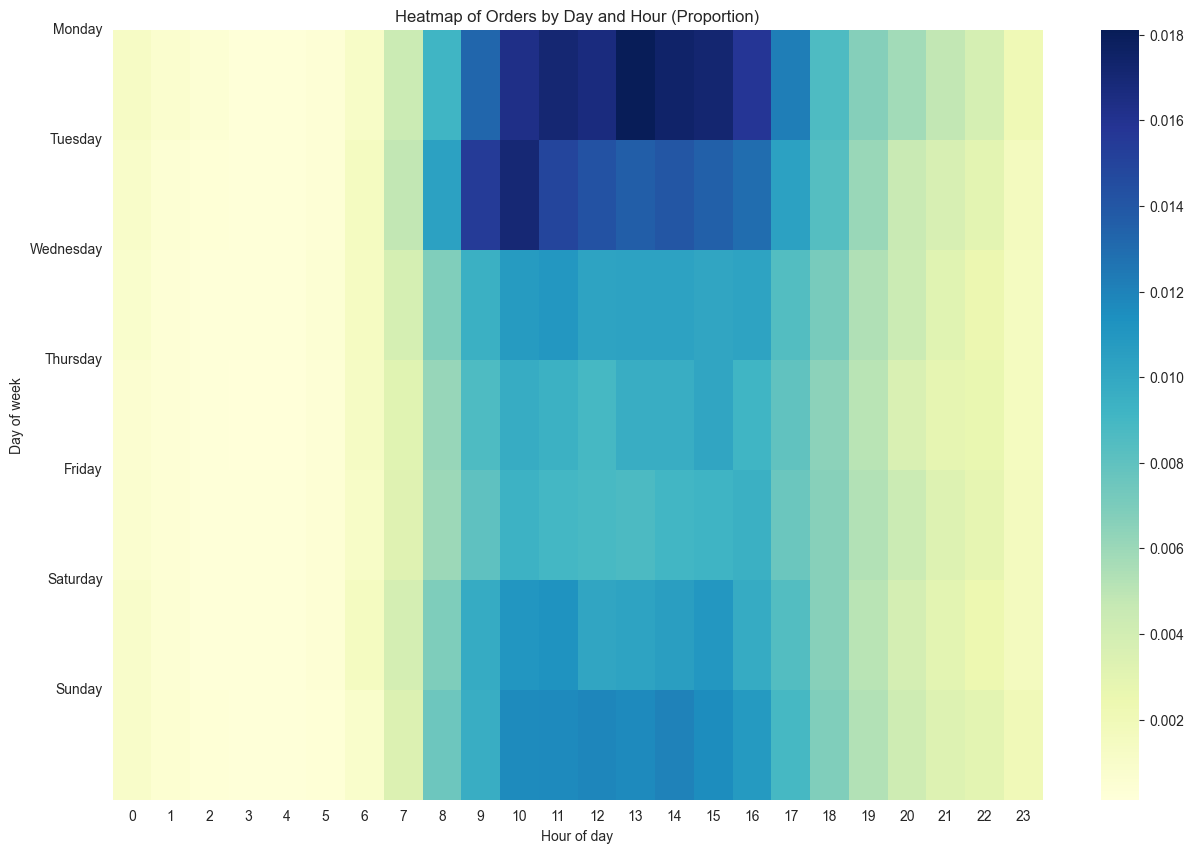

In [416]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'order_dow', 'order_hour_of_day', and 'order_number'

day_hour_df = df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

# Create the pivot table with the correct number of arguments
day_hour_df_piv = day_hour_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

# Calculate proportions of orders after creating the pivot table
day_hour_df_piv = day_hour_df_piv / df.shape[0]

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(day_hour_df_piv, cmap='YlGnBu')

# Customize labels and title
plt.yticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Hour of day")
plt.yticks(rotation=0)
plt.ylabel("Day of week")
plt.title("Heatmap of Orders by Day and Hour (Proportion)")

plt.show()  # Display the heatmap


In [417]:
def order_time(x):
    return f'{"morning" if x in range(6, 12) else "afternoon" if x in range(12, 18) else "evening" if x in range(18, 23) else "night"}'
    

In [418]:
df['order_time_period'] = df['order_hour_of_day'].apply(order_time)
df


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening


In [419]:
df.pivot_table(index='order_dow',columns='order_time_period',values='user_id',aggfunc=['count'])


count                       
order_time_period afternoon evening morning  night
order_dow                                         
0                    196603   60195  123876  11157
1                    158970   51825  129591   8850
2                    120927   45497   87562   7926
3                    112185   41737   77609   7199
4                    107170   45359   74338   8017
5                    121577   42311   89662   8607
6                    135073   45737   90397   9544

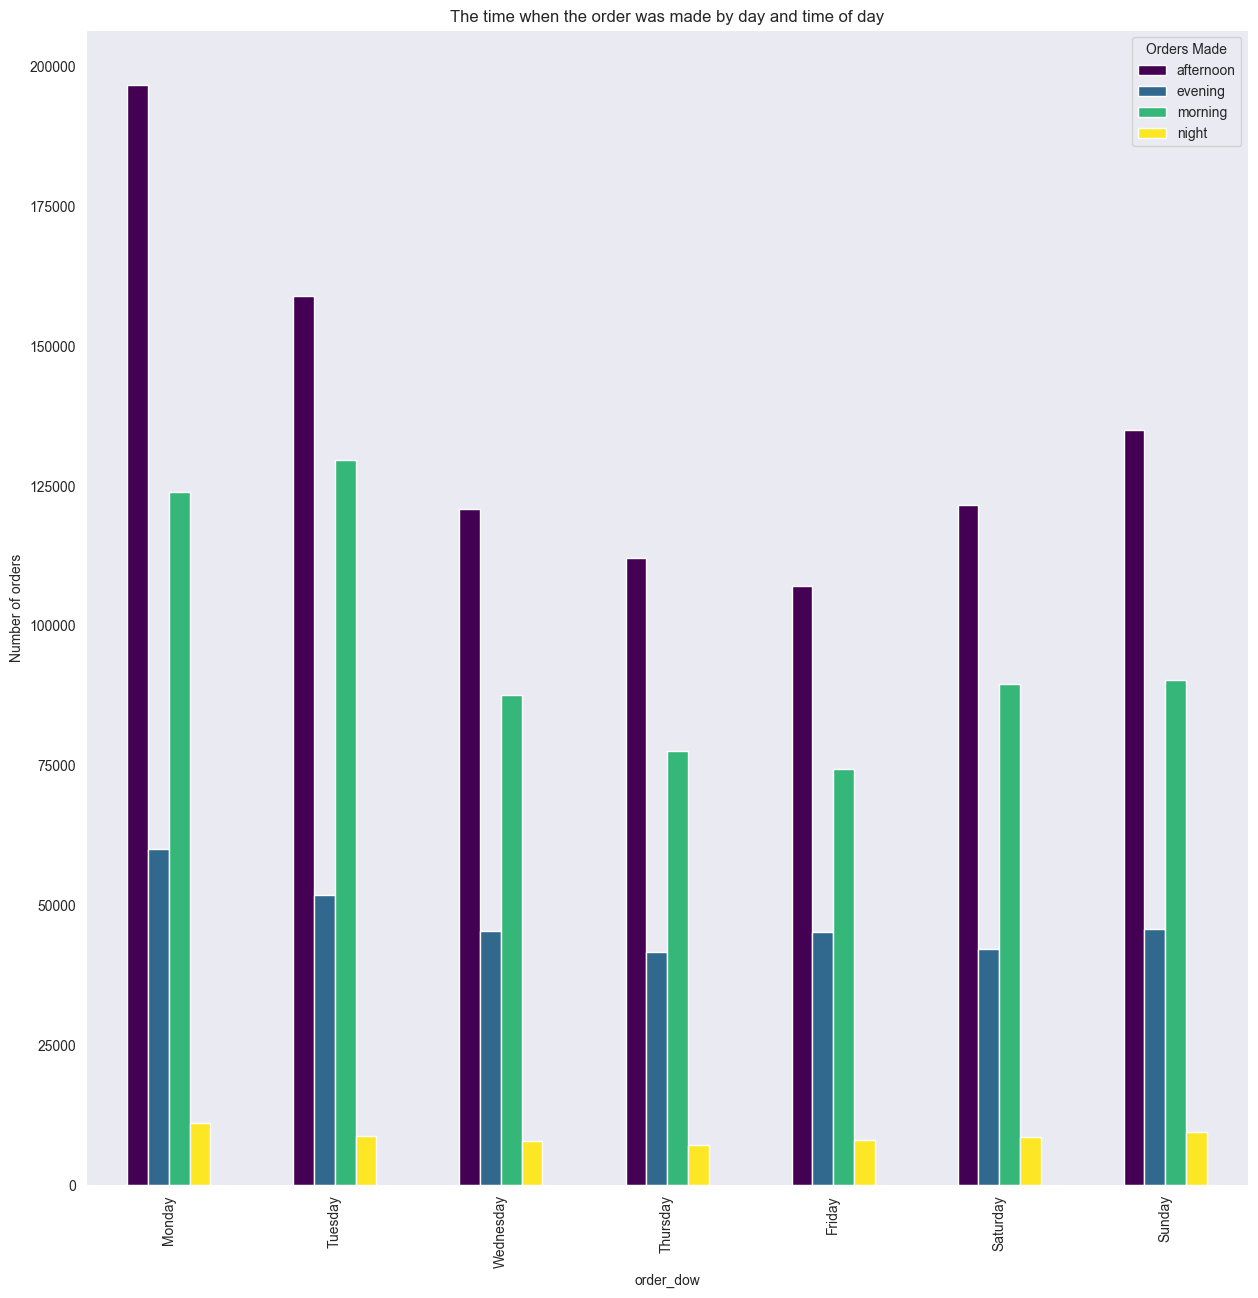

In [420]:
# Define the color palette
color_palette = plt.get_cmap('viridis')

# Generate the plot
orders_by_day_time = df.pivot_table(
    index='order_dow',
    columns='order_time_period',
    values='user_id',
    aggfunc='count'
)

ax = orders_by_day_time.plot(kind='bar', figsize=(15, 15), color=color_palette(np.linspace(0, 1, len(orders_by_day_time.columns))))
ax.set_title('The time when the order was made by day and time of day')
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]) # fixed the x-axis labels
ax.set_ylabel('Number of orders')
ax.legend(title='Orders Made', bbox_to_anchor=(1.0, 1.0))
plt.show()


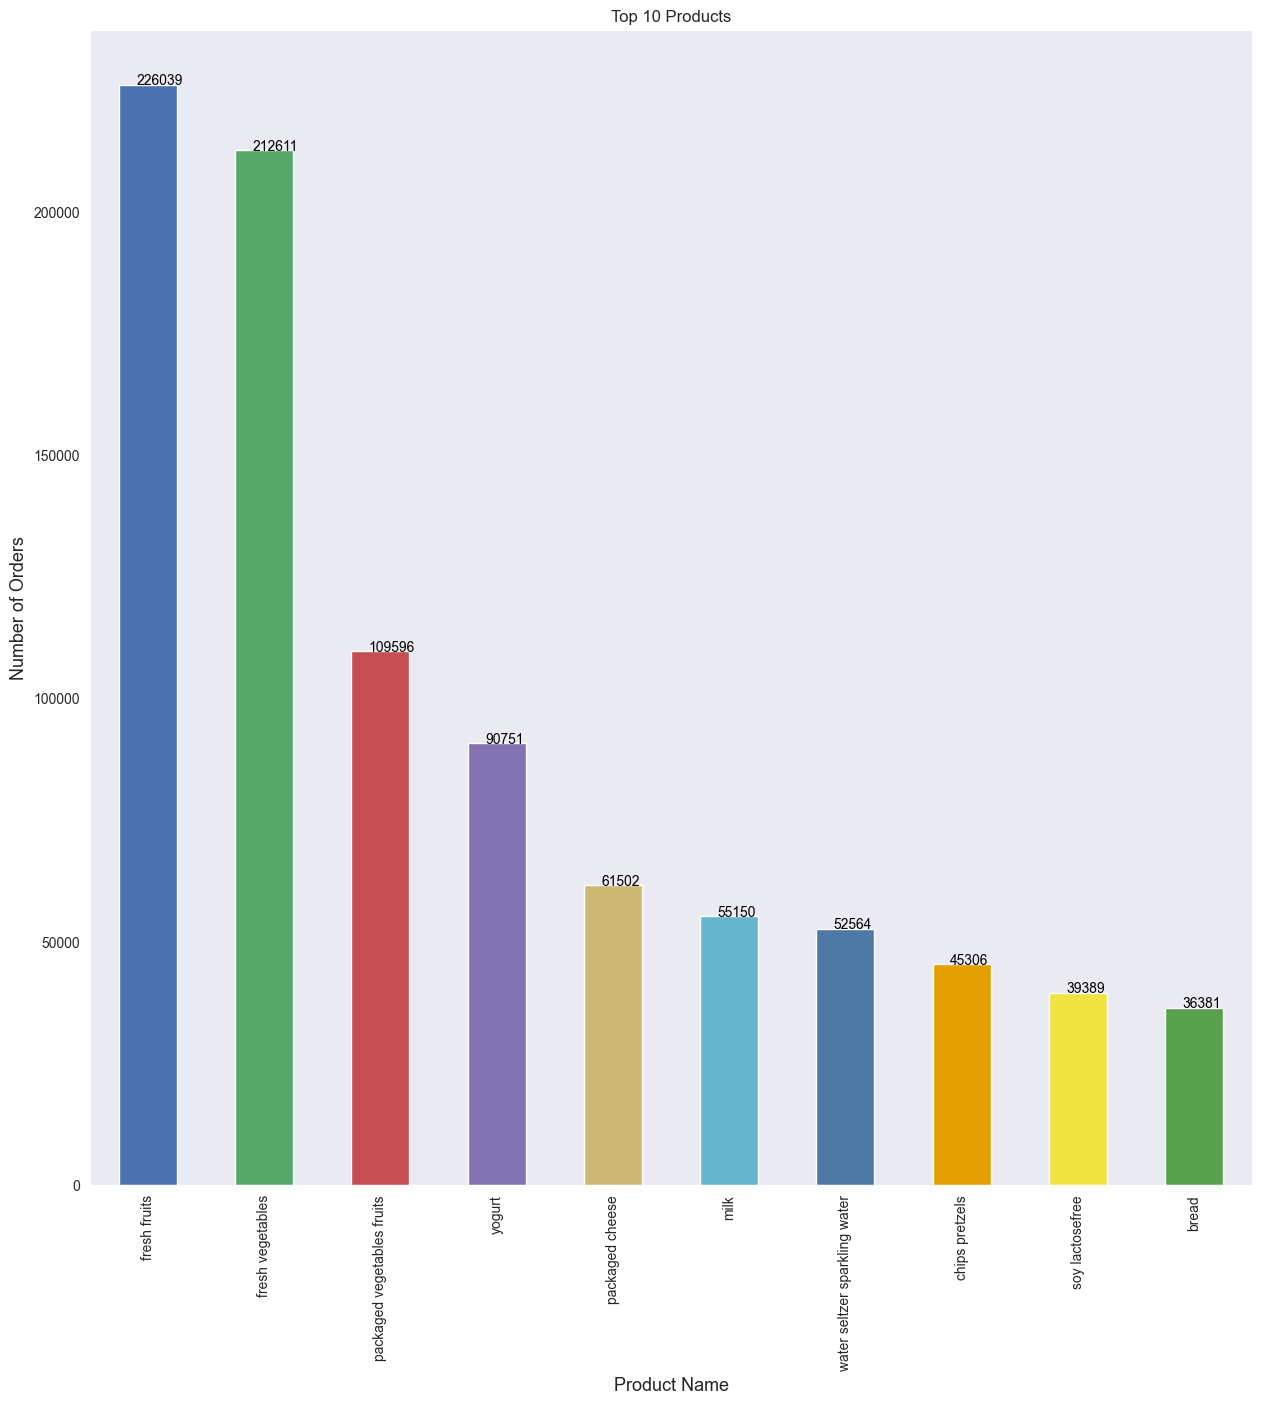

In [421]:
top_products = df.groupby('product_name')['user_id'].count().sort_values(ascending=False).head(10)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4E79A7', '#E69F00', '#F0E442', '#59A14F', '#8C8C8C', '#9C755F', '#EDB8A7', '#BDBDBD', '#000000']
ax = top_products.plot(kind='bar', title='Top 10 Products', color=colors, figsize=(15, 15))
plt.xlabel('Product Name',fontsize=13)
plt.ylabel('Number of Orders',fontsize=13)
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()


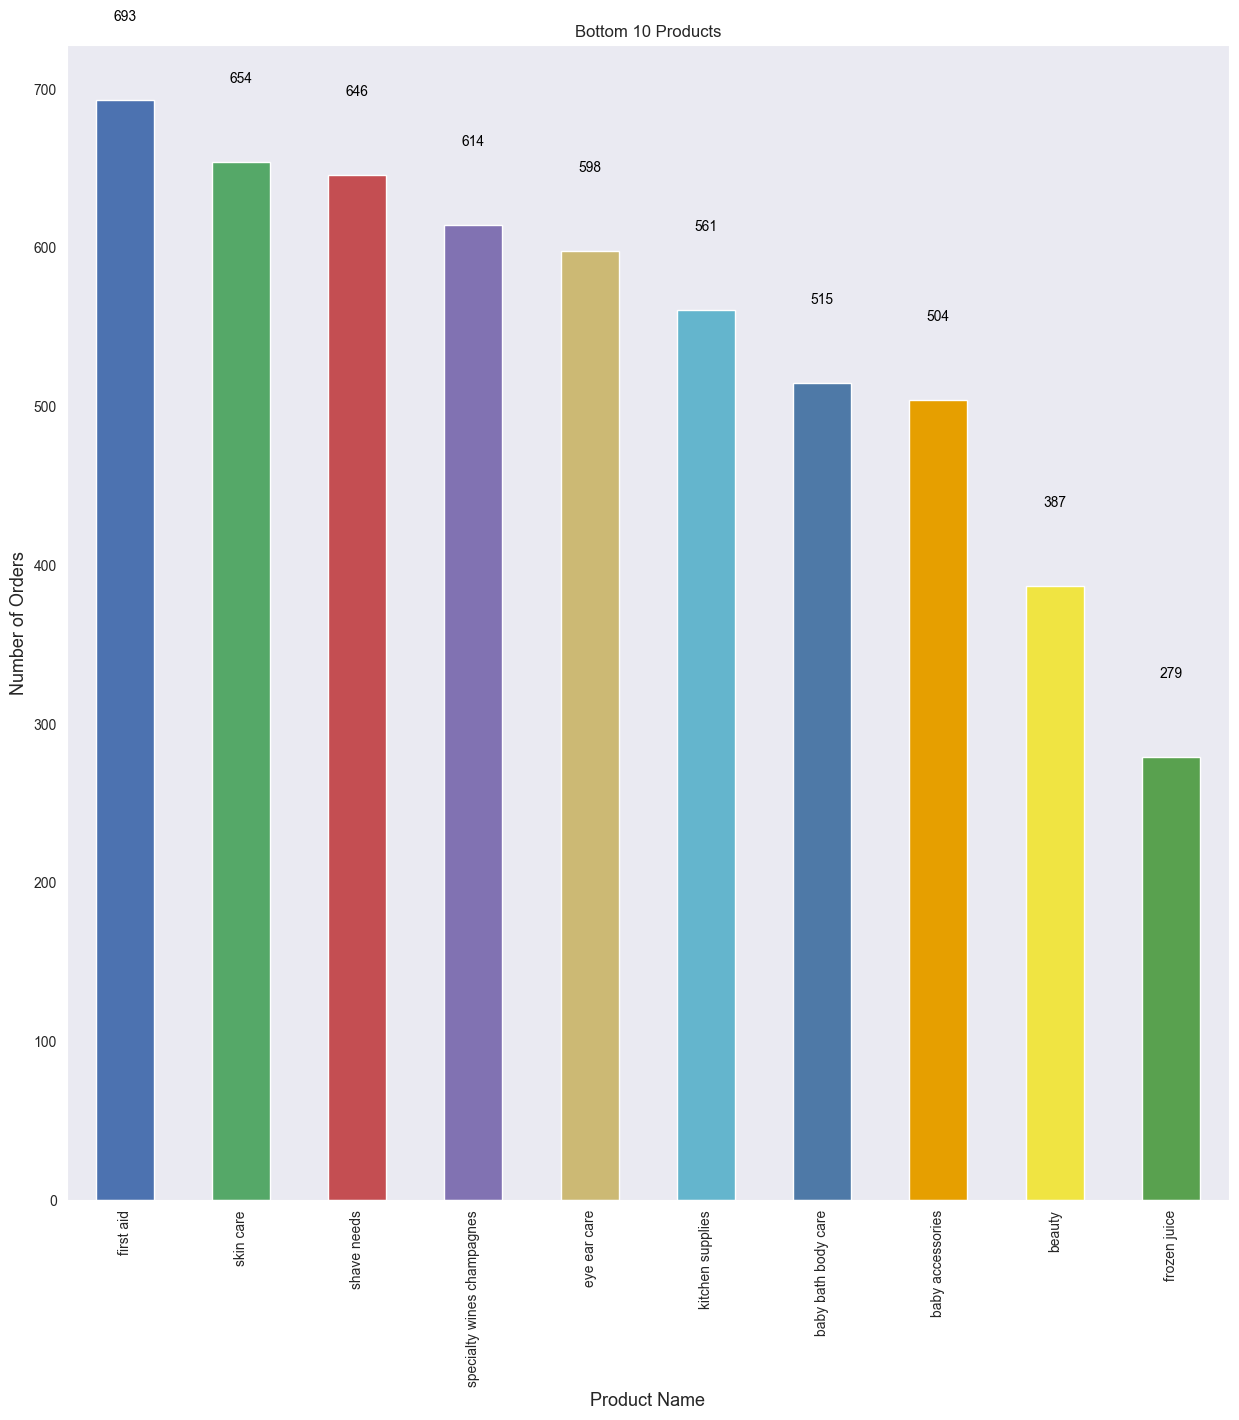

In [422]:
bottom_products = df.groupby('product_name')['user_id'].count().sort_values(ascending=False).tail(10)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4E79A7', '#E69F00', '#F0E442', '#59A14F', '#8C8C8C', '#9C755F', '#EDB8A7', '#BDBDBD', '#000000']
ax = bottom_products.plot(kind='bar', title='Bottom 10 Products', color=colors, figsize=(15, 15))
plt.xlabel('Product Name',fontsize=13)
plt.ylabel('Number of Orders',fontsize=13)
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()


In [423]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PURCHASING BEHAVIOUR
grouped = df.groupby(["product_id","product_name","department","order_time_period"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
del grouped["index"]
grouped


,product_id,product_name,department,order_time_period,reordered
0,24,fresh fruits,produce,afternoon,104177
1,83,fresh vegetables,produce,afternoon,102115
2,24,fresh fruits,produce,morning,77479
3,83,fresh vegetables,produce,morning,68634
4,123,packaged vegetables fruits,produce,afternoon,51493
5,120,yogurt,dairy eggs,afternoon,41484
6,24,fresh fruits,produce,evening,37544
7,123,packaged vegetables fruits,produce,morning,36210
8,83,fresh vegetables,produce,evening,35026
9,120,yogurt,dairy eggs,morning,31412


In [424]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PRODUCT REORDERED RATIO
grouped = df.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped


,reordered,product_id,Ratio
0,0,828515,0.410257
1,1,1190986,0.589743


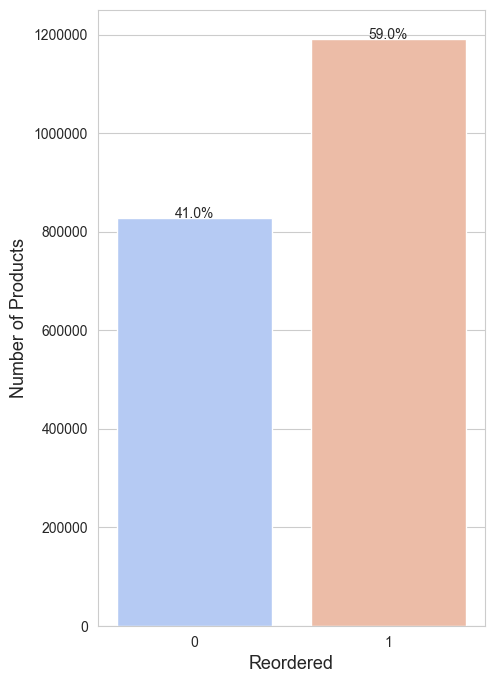

In [425]:
grouped = grouped.groupby(['reordered']).sum()['product_id'].sort_values(ascending=True)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')

grouped_pct = grouped/grouped.sum() * 100
for i, v in enumerate(grouped.values):
    ax.text(i, v+3, f'{grouped_pct.values[i]:.1f}%', ha='center', fontsize=10)

plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [426]:
pd.set_option('display.expand_frame_repr', True)


In [427]:
df


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening


In [428]:
def bar_plot(df,col):

    fig = px.bar(df,
        x = df[col].value_counts().keys(), 
        y = df[col].value_counts().values,
        color= df[col].value_counts().keys()
    )
    fig.update_layout(
    xaxis_title= col,
    yaxis_title="Count",
    legend_title=col,
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
    
    fig.show()
    

In [429]:
# PRODUCT BAR PLOT 
bar_plot(df, 'product_name')


In [430]:
new_df = df.groupby(['user_id','department'])['product_name'].apply(sum)
new_df


user_id  department
2        dairy eggs                       packaged cheesepackaged cheese
         deli          lunch meatprepared soups saladsfresh dips tape...
         produce                    fresh fruitsfresh fruitsfresh fruits
         snacks                      popcorn jerkycrackerschips pretzels
3        beverages                         water seltzer sparkling water
                                             ...                        
206209   frozen                                           frozen produce
         household     laundrytrash bags linersfood storagedish deter...
         pantry                                        spices seasonings
         produce       packaged vegetables fruitsfresh fruitsfresh fr...
         snacks                                         crackerscrackers
Name: product_name, Length: 639006, dtype: object

In [431]:
transactions = [a[1]['product_name'].tolist() for a in list(df.groupby(['user_id','department']))]


In [432]:
# DISPLAYING 20 PAIRS OF TRANSACTION 
first_20_transactions = transactions[:20]

# PRINT HEAD OF 20 Print head of 20 transactions
for i, transaction in enumerate(first_20_transactions):
    print(f"Transaction {i+1}: {transaction}")
    

Transaction 1: ['packaged cheese', 'packaged cheese']
Transaction 2: ['lunch meat', 'prepared soups salads', 'fresh dips tapenades']
Transaction 3: ['fresh fruits', 'fresh fruits', 'fresh fruits']
Transaction 4: ['popcorn jerky', 'crackers', 'chips pretzels']
Transaction 5: ['water seltzer sparkling water']
Transaction 6: ['other creams cheeses', 'packaged cheese', 'soy lactosefree', 'soy lactosefree', 'soy lactosefree']
Transaction 7: ['ice cream ice', 'frozen breakfast']
Transaction 8: ['paper goods']
Transaction 9: ['spreads']
Transaction 10: ['fresh fruits', 'packaged vegetables fruits', 'fresh fruits', 'fresh fruits', 'packaged vegetables fruits', 'packaged vegetables fruits']
Transaction 11: ['nuts seeds dried fruit', 'nuts seeds dried fruit', 'crackers']
Transaction 12: ['bread']
Transaction 13: ['refrigerated', 'coffee', 'refrigerated', 'refrigerated', 'refrigerated', 'coffee', 'refrigerated']
Transaction 14: ['canned meals beans', 'canned fruit applesauce']
Transaction 15: ['p

In [433]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)


In [434]:
# Get the head of 20 columns and create a list of dictionaries
head_cols = [{'Product': ' '.join(col)} for col in te.columns_[:20]]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(head_cols)

# Display the DataFrame
print(df)


                                              Product
0         a i r   f r e s h e n e r s   c a n d l e s
1                               a s i a n   f o o d s
2                     b a b y   a c c e s s o r i e s
3               b a b y   b a t h   b o d y   c a r e
4                   b a b y   f o o d   f o r m u l a
5                       b a k e r y   d e s s e r t s
6                 b a k i n g   i n g r e d i e n t s
7           b a k i n g   s u p p l i e s   d e c o r
8                                         b e a u t y
9                           b e e r s   c o o l e r s
10                  b o d y   l o t i o n s   s o a p
11                                          b r e a d
12                    b r e a k f a s t   b a k e r y
13      b r e a k f a s t   b a r s   p a s t r i e s
14  b u l k   d r i e d   f r u i t s   v e g e t ...
15  b u l k   g r a i n s   r i c e   d r i e d   ...
16                                b u n s   r o l l s
17                          

In [435]:
#te.columns_
te_ary


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [436]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()
pf


,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
count,639006,639006,639006,639006,639006,639006,639006,639006,639006,639006,...,639006,639006,639006,639006,639006,639006,639006,639006,639006,639006
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,638062,631396,638572,638554,632592,637201,625861,637761,638660,637531,...,625783,629963,633844,629603,637236,637208,636663,612103,637855,603025


In [437]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions


,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
639003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [438]:
item


,Count,Item
50,66823,fresh fruits
53,56265,fresh vegetables
98,49230,packaged vegetables fruits
133,35981,yogurt
93,34049,packaged cheese
83,32024,milk
131,26903,water seltzer sparkling water
25,25682,chips pretzels
11,24363,bread
119,24001,soy lactosefree


In [439]:
import plotly.express as px

pio.renderers.default = "notebook_connected"
# TREEMAP VISUALIZATION OF ITEMS
fig = px.bar(item, x='Item', y='Count')
fig.update_layout(title='Visualizing Item Counts with a Treemap', title_font_size=20, title_x=0.5)
fig.show()

fig.show()


In [440]:
freq_items = apriori(transactions, min_support=0.005, use_colnames=True, verbose=1)
freq_items.head(7)


Processing 5 combinations | Sampling itemset size 5 43


,support,itemsets
0,0.011909,(asian foods)
1,0.010037,(baby food formula)
2,0.020571,(baking ingredients)
3,0.038126,(bread)
4,0.016698,(breakfast bakery)
5,0.008551,(buns rolls)
6,0.019820,(butter)


In [441]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))


In [442]:
freq_items.head(10)


,support,itemsets,length
0,0.011909,(asian foods),1
1,0.010037,(baby food formula),1
2,0.020571,(baking ingredients),1
3,0.038126,(bread),1
4,0.016698,(breakfast bakery),1
5,0.008551,(buns rolls),1
6,0.019820,(butter),1
7,0.016790,(candy chocolate),1
8,0.006285,(canned fruit applesauce),1
9,0.019266,(canned jarred vegetables),1


In [443]:
freq_items.tail(10)


,support,itemsets,length
160,0.015864,"(fresh vegetables, fresh herbs, packaged veget...",3
161,0.006750,"(packaged cheese, other creams cheeses, milk)",3
162,0.006617,"(yogurt, other creams cheeses, milk)",3
163,0.006573,"(soy lactosefree, packaged cheese, milk)",3
164,0.014086,"(yogurt, packaged cheese, milk)",3
165,0.007654,"(yogurt, soy lactosefree, milk)",3
166,0.007330,"(yogurt, packaged cheese, other creams cheeses)",3
167,0.009133,"(yogurt, packaged cheese, soy lactosefree)",3
168,0.005316,"(eggs, yogurt, packaged cheese, milk)",4
169,0.014585,"(fresh fruits, fresh vegetables, fresh herbs, ...",4


In [444]:
freq_items[(freq_items['length']==3)&(freq_items['support']>=0.005)]


,support,itemsets,length
144,0.005894,"(milk, packaged cheese, butter)",3
145,0.005837,"(yogurt, milk, butter)",3
146,0.006061,"(yogurt, packaged cheese, butter)",3
147,0.005527,"(cream, packaged cheese, milk)",3
148,0.005793,"(yogurt, cream, milk)",3
149,0.005868,"(yogurt, cream, packaged cheese)",3
150,0.008014,"(eggs, packaged cheese, milk)",3
151,0.008557,"(eggs, yogurt, milk)",3
152,0.005310,"(eggs, packaged cheese, soy lactosefree)",3
153,0.008944,"(eggs, yogurt, packaged cheese)",3


In [445]:
# Run association rule mining
if frequent_itemsets.shape > (0, 0):  # Check if there are any frequent itemsets before running association rules
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

   # Convert product IDs to product names in rules
    def id_to_name(product_ids):
        return ', '.join([product_mapping[int(id)] for id in product_ids])

    rules['antecedents'] = rules['antecedents'].apply(lambda x: id_to_name(x))
    rules['consequents'] = rules['consequents'].apply(lambda x: id_to_name(x))

    # Print association rules with support, confidence, and lift values
    print("\nAssociation Rules:")
    rules = rules.sort_values(by='confidence', ascending=False)
    print(rules.head())

    # Print association rules with support, confidence, and lift values, and pattern
    print("\nAssociation Rules with Pattern:")
    for index, row in rules.iterrows():
        print(f"Rule: {row['antecedents']} -> {row['consequents']}")
        print(f"Support: {row['support']}")
        print(f"Confidence: {row['confidence']}")
        print(f"Lift: {row['lift']}")
        print("\n")
else:
    print("No frequent itemsets found. Please consider adjusting minimum support or exploring the data further.")
    


Association Rules:
                                            antecedents       consequents  \
1494  fresh fruits, fresh herbs, canned jarred veget...  fresh vegetables   
1488      fresh fruits, fresh herbs, canned meals beans  fresh vegetables   
3716  soy lactosefree, fresh vegetables, packaged ch...      fresh fruits   
3045  fresh herbs, fresh fruits, soy lactosefree, pa...  fresh vegetables   
1491     fresh fruits, fresh herbs, soup broth bouillon  fresh vegetables   

      antecedent support  consequent support   support  confidence      lift  \
1494            0.013596            0.445715  0.012744    0.937293  2.102897   
1488            0.011314            0.445715  0.010592    0.936170  2.100379   
3716            0.010823            0.557690  0.010071    0.930491  1.668473   
3045            0.012202            0.445715  0.011339    0.929305  2.084977   
1491            0.011866            0.445715  0.011018    0.928571  2.083330   

      leverage  conviction  zhangs_m